<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports-and-setup-functions" data-toc-modified-id="Imports-and-setup-functions-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports and setup functions</a></span></li><li><span><a href="#Read-netCDF-files" data-toc-modified-id="Read-netCDF-files-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Read netCDF files</a></span><ul class="toc-item"><li><span><a href="#Methods" data-toc-modified-id="Methods-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Methods</a></span></li><li><span><a href="#Test:-Read-data-from-2021" data-toc-modified-id="Test:-Read-data-from-2021-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Test: Read data from 2021</a></span></li></ul></li></ul></div>

# Imports and setup functions

In [1]:
import os
from matplotlib import pyplot as plt
import numpy as np
import netCDF4 as nc
import xarray

In [2]:
def dataDir(x):
    cwd = os.getcwd()
    
    return cwd + "/data/" + x

# Read netCDF files

## Methods

In [3]:
def create_month_dataset(year_path, exclude=[]):
    
    # |data/
    # |--- |SST_ATL_PHY.../
    # |----|-------------- |2021/
    # |----|---------------|--- |01/
    # |----|---------------|----|- 20210101_image.nc  # (day 1)
    # |----|---------------|----|- 20210102_image.nc  # (day 2)
    # |----|---------------|----|- 20210103_image.nc  # (day 3) ...
    
    dataset = {}
    
    m_paths = [year_path + m for m in os.listdir(year_path)]
    m_paths.sort()
    
    print("Creating dataset from year: " + year_path[-5:-1] + "...")
    
    for m in m_paths:
        
        # Create ID
        m_id = "sst_" + year_path[-5:-1] + "-" + m[-2:]
        
        # Read data into MFDataset
        print("...Month: " + m[-2:] + "...")
        
        m_nc = nc.MFDataset(files=(m + "/*.nc"), aggdim="time", 
                            exclude=exclude)
       
        # Save to dictionary with datasets
        dataset[m_id] = m_nc
        
    return dataset

## Test: Read data from 2021

In [80]:
vars_to_exclude = ["lat", "lon", "sst_dtime", "solar_zenith_angle", 
                   "quality_level", "sses_bias", "sses_standard_deviation", 
                   "or_latitude", "or_longitude", "or_number_of_pixels", 
                   "adjusted_sea_surface_temperature", "source_of_sst", 
                   "satellite_zenith_angle", "time"]


test = create_month_dataset(dataDir("SST_ATL_PHY_L3S_NRT_010_037/2021/"),
                            vars_to_exclude)

Creating dataset from year: 2021...
...Month: 01...
...Month: 02...
...Month: 03...
...Month: 04...
...Month: 05...
...Month: 06...
...Month: 07...
...Month: 08...
...Month: 09...
...Month: 10...
...Month: 11...
...Month: 12...


In [82]:
test["sst_2021-06"]["sea_surface_temperature"].shape

(30, 2950, 2000)

In [27]:
# FIXME: doesn't seem to be indexing correctly

def slice_images_by_geo(img, latmin, latmax, lonmin, lonmax, 
                        var="sea_surface_temperature", end_shape=(256, 256)):
    
    lat, lon = img.variables['lat'][:], img.variables['lon'][:]
    v = img.variables[var][:]
    
    lat_mask = np.where((lat < latmax) & (lat > latmin), True, False)
    lon_mask = np.where((lon < lonmax) & (lon > lonmin), True, False)
    
    var_slice = []
    
    for m in range(len(v)):
        var_slice.append(v[m,][lat_mask,:][:,lon_mask]) # FIXME: here

    return np.asarray(var_slice)

In [28]:
test_slice = slice_images_by_geo(test["sst_2021-06"], latmin=45, latmax=50.5, lonmin=-20.5, lonmax=-15)
print(test_slice.shape)

(30, 275, 275)


In [31]:
print(test_slice.min())
print(test_slice.max())
print(test_slice.mean())

-32768.0
291.44
-23313.600586212684


In [77]:
test_slice[:,][:256,:256].shape #[:,:256].shape # 30x256x256

(30, 256, 275)

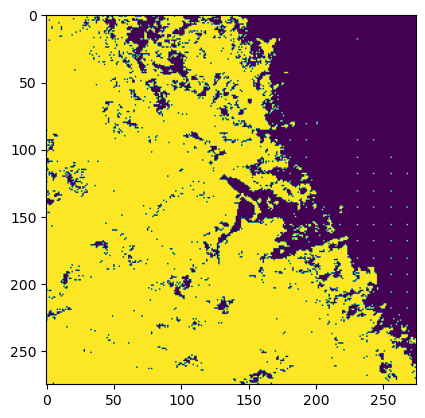

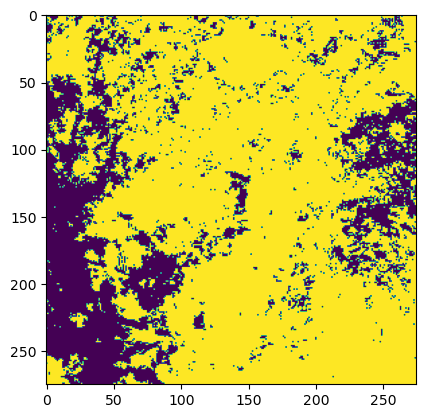

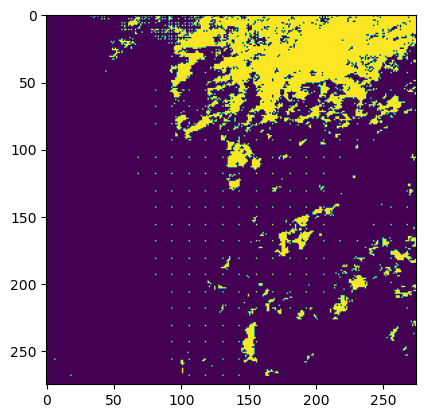

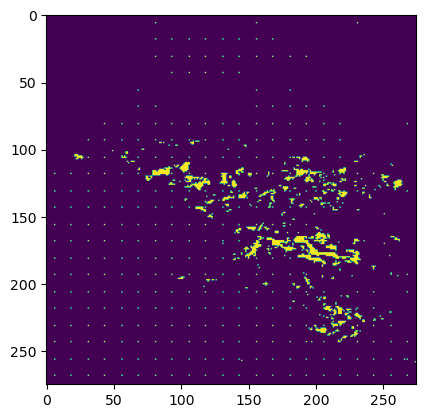

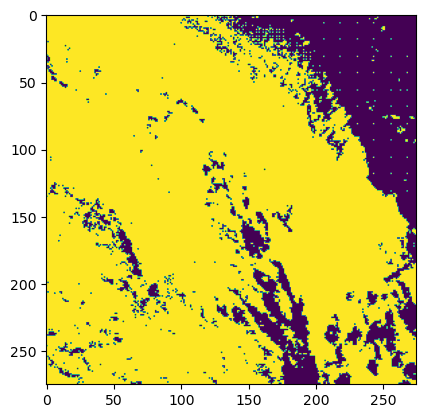

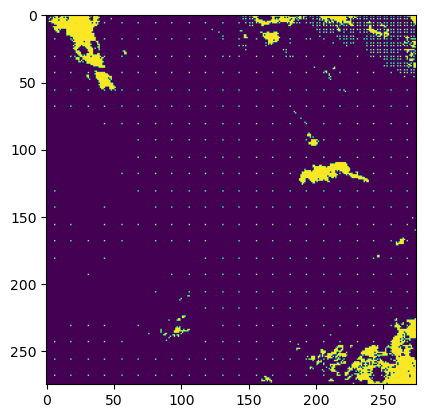

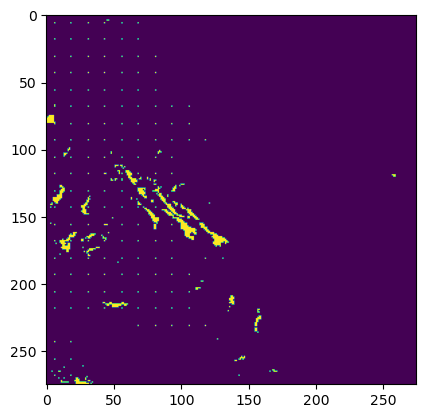

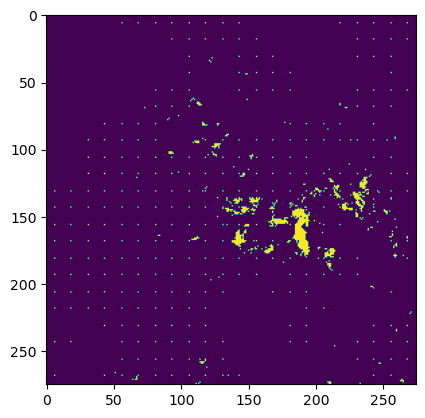

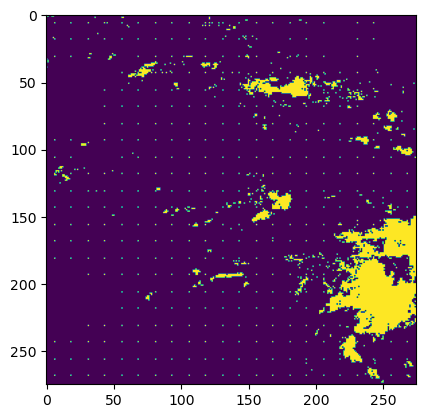

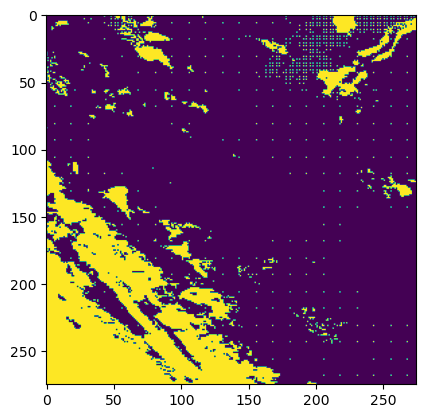

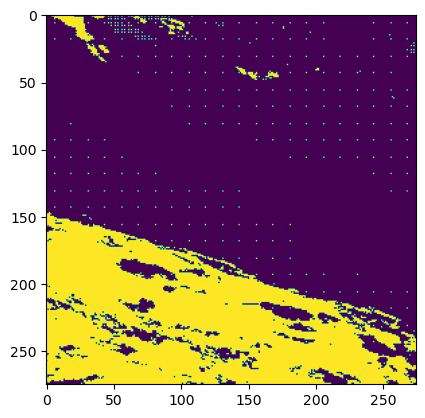

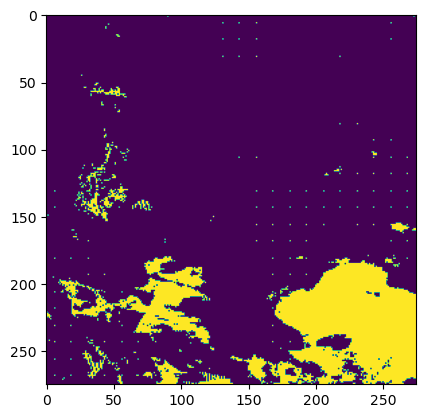

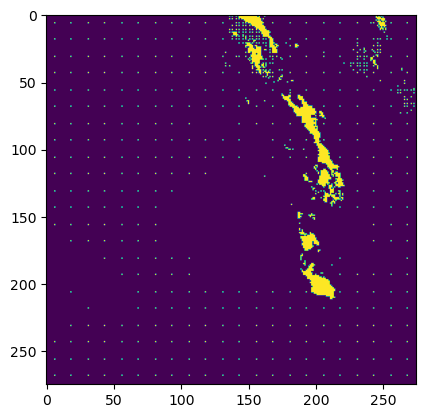

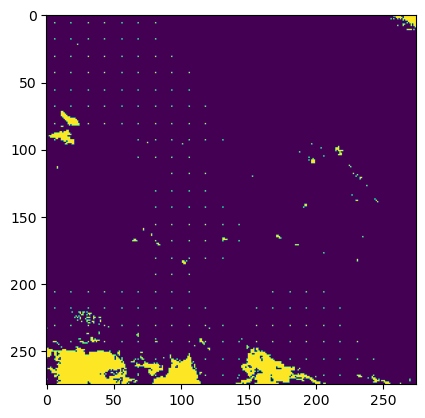

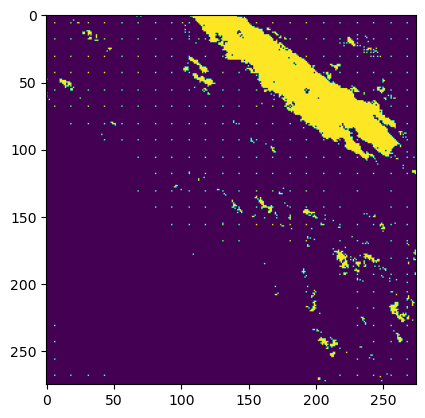

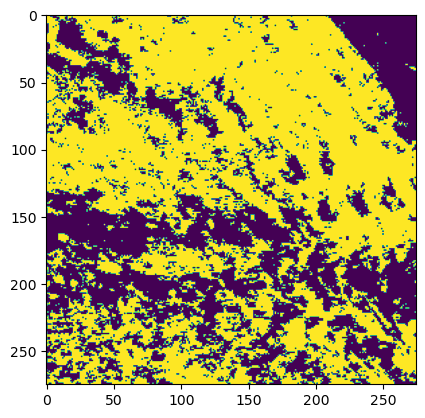

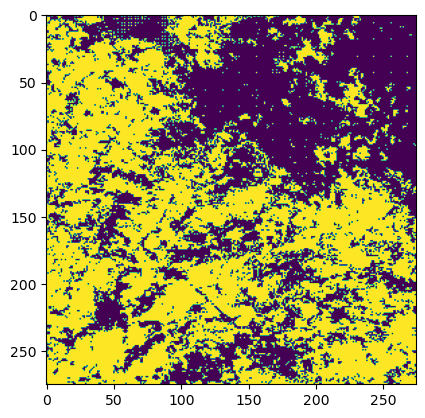

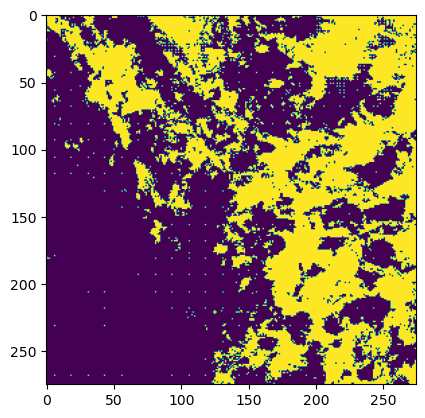

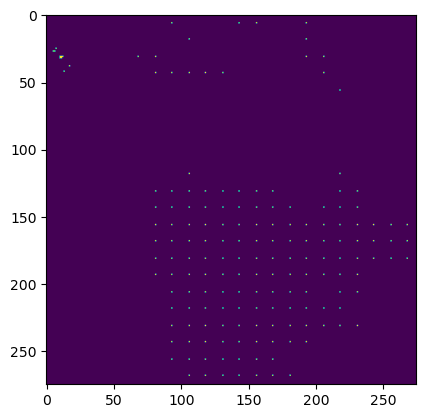

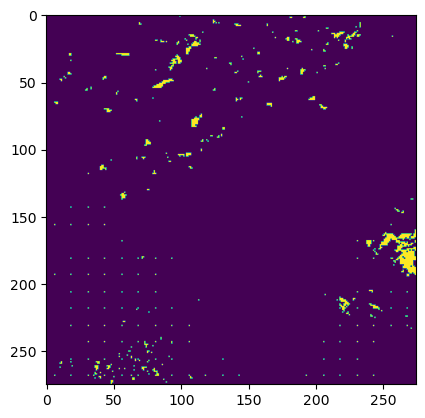

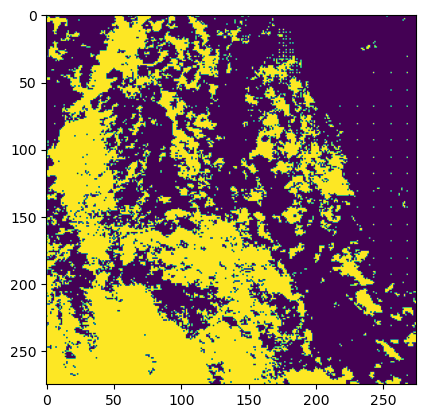

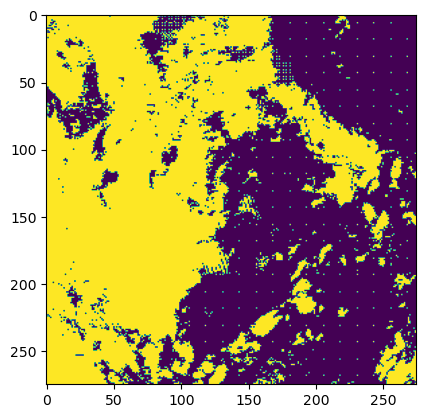

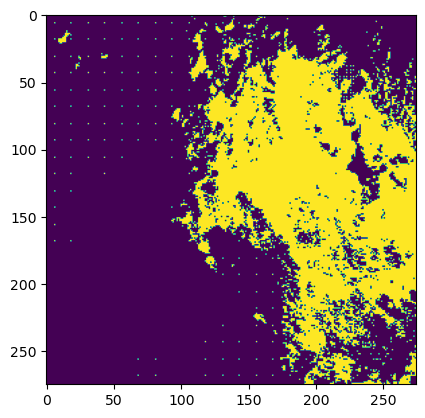

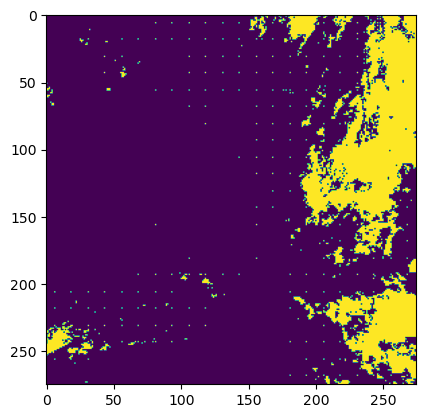

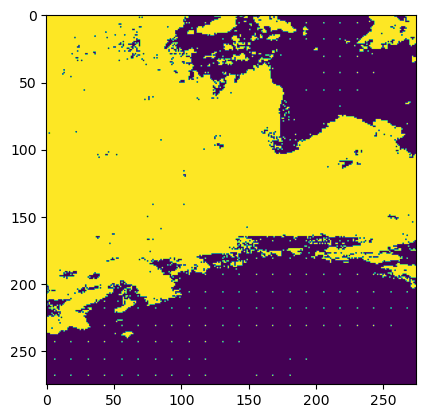

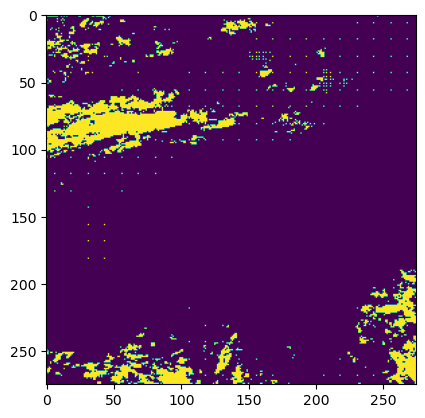

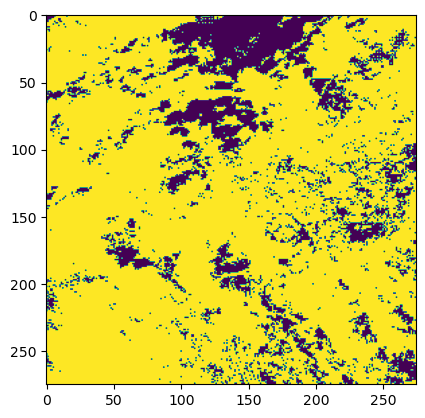

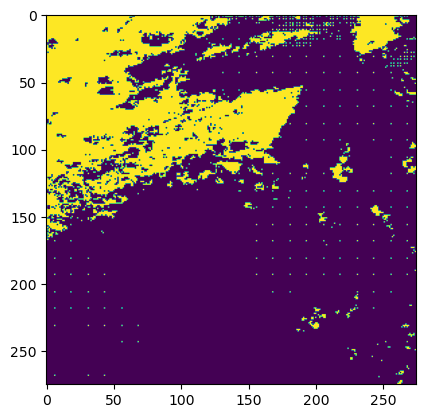

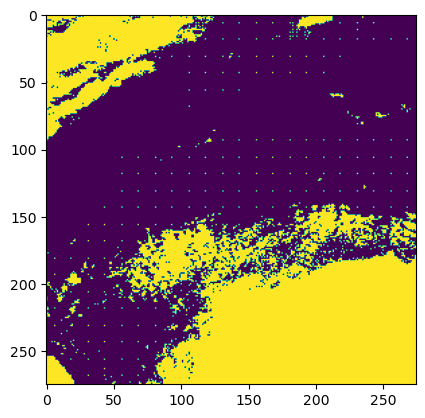

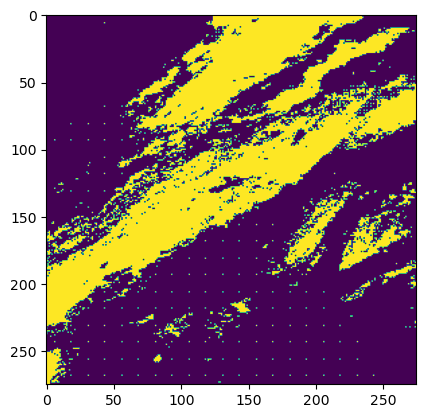

In [30]:
#june1 = sst[0,] # the snapshot of the first of June 
#plt.imshow(june1)

for i in range(len(test_slice)):
    plt.imshow(test_slice[i,])
    plt.show()

In [ ]:
# TODOs:
# 1. Look at masked_array class and see if just numeric values can be extracted
#    Link: https://numpy.org/doc/stable/reference/maskedarray.html
#    To get a sense of data, try plotting with and without masked values -> can also use this to check whether above is correct
# 2. Load extracted numeric values into PyTorch Dataset
#    Link: https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset
# 3. Clean up imports
# 4. Convert units from K to degrees C

https://www.youtube.com/@climateunboxed/videos

https://www.earthinversion.com/utilities/reading-NetCDF4-data-in-python/

https://stackoverflow.com/questions/36360469/read-nc-netcdf-files-using-python

https://unidata.github.io/netcdf4-python/#creatingopeningclosing-a-netcdf-file

https://marine.copernicus.eu/user-corner/user-notification-service/gh-416-technical-issue-impacting-new

https://www.earthdatascience.org/courses/use-data-open-source-python/hierarchical-data-formats-hdf/use-netcdf-in-python-xarray/

https://docs.xarray.dev/en/stable/generated/xarray.open_mfdataset.html

https://stackoverflow.com/questions/35422862/speeding-up-reading-of-very-large-netcdf-file-in-python

https://numpy.org/doc/stable/reference/maskedarray.html

Data sources:
1. https://help.marine.copernicus.eu/en/articles/7045314-migrating-to-the-new-global-physical-analysis-and-forecasting-system#h_8019e3e7f7
2. https://data.marine.copernicus.eu/product/GLOBAL_ANALYSISFORECAST_PHY_001_024/services
3. https://help.marine.copernicus.eu/en/articles/4521873-how-to-download-a-dataset-from-ftp-server
4. SST_ATL_PHY_L3S_NRT_010_037